## PROPOSED METHODOLOGY

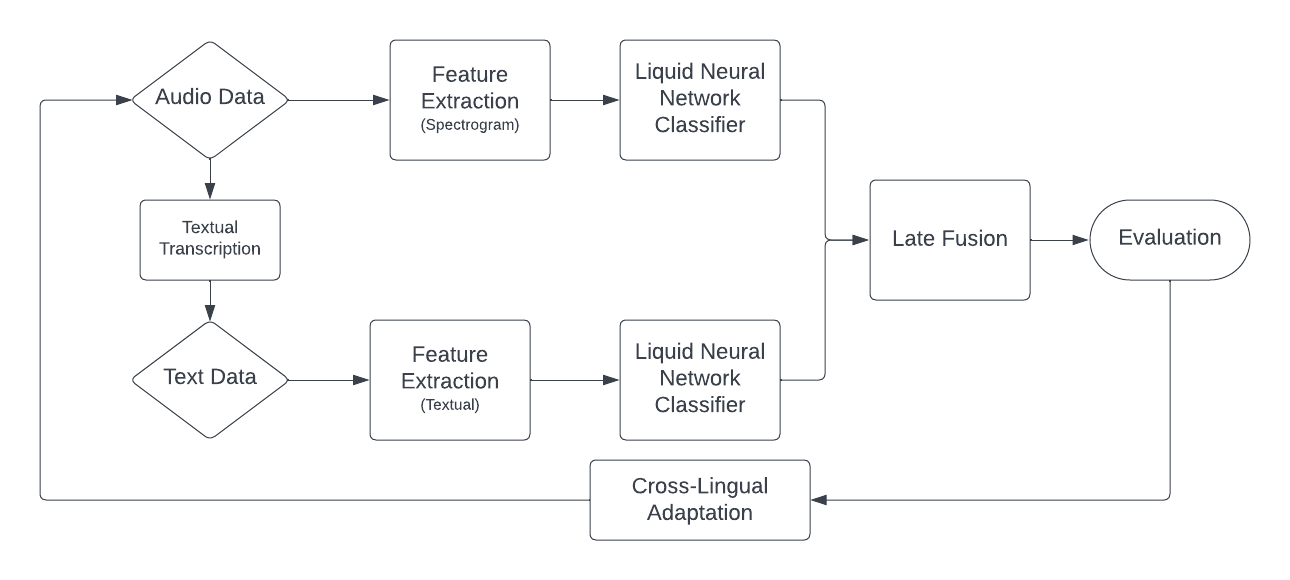

## Textual Transcription

In [ ]:
!sudo pip3 install SpeechRecognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 34.8 MB/s eta 0:00:00


In [ ]:
#import speech_recognition as sr
import os
import csv
from tqdm import tqdm

#r = sr.Recognizer()

In [ ]:
def startConversion(folder_path, lang, output_file):
    files = [filename for filename in os.listdir(folder_path) if filename.endswith('.wav')]
    total_files = len(files)

    with open(output_file, 'w', newline='', encoding='utf-8') as csvfile:
        csv_writer = csv.writer(csvfile)
        csv_writer.writerow(['File Name', 'Transcription'])

        for filename in tqdm(files, desc='Processing', unit='file'):
            file_path = os.path.join(folder_path, filename)

            with sr.AudioFile(file_path) as source:
                audio_text = r.listen(source)

                try:
                    text = r.recognize_google(audio_text, language=lang)
                    csv_writer.writerow([filename, text])
                except sr.UnknownValueError:
                    pass  # Skip this file
                except sr.RequestError as e:
                    pass  # Skip this file
                except Exception as e:
                    pass  # Skip this file


In [ ]:
# BENGALI
if __name__ == '__main__':
    startConversion('/content/drive/MyDrive/adima/audios-001/Prima/SC_audio_Bengali/', 'bn-BD', '/content/drive/MyDrive/adima/audios-001/transcription_bengali.csv')

Processing: 100%|██████████| 1200/1200 [1:08:24<00:00,  3.42s/file]


In [ ]:
# GUJARATI
startConversion('/content/drive/MyDrive/adima/audios-001/Prima/SC_audio_Gujarati/', 'gu-IN', '/content/drive/MyDrive/adima/audios-001/transcription_gujarati.csv')

Processing: 100%|██████████| 1200/1200 [46:04<00:00,  2.30s/file]


In [ ]:
# HINDI
startConversion('/content/drive/MyDrive/adima/audios-001/Prima/SC_audio_Hindi/', 'hi-IN', '/content/drive/MyDrive/adima/audios-001/transcription_hindi.csv')

Processing: 100%|██████████| 1210/1210 [1:13:52<00:00,  3.66s/file]


In [ ]:
# KANNADA
# startConversion('/content/drive/MyDrive/adima/audios-001/Prima/SC_audio_Kannada/', 'kn-IN', '/content/drive/MyDrive/adima/audios-001/transcription_kannada.csv')

In [ ]:
# MALAYALAM
# startConversion('/content/drive/MyDrive/adima/audios-001/Prima/SC_audio_Malayalam/', 'ml-IN', '/content/drive/MyDrive/adima/audios-001/transcription_malayalam.csv')

In [ ]:
# PUNJABI
# startConversion('/content/drive/MyDrive/adima/audios-001/Prima/SC_audio_Punjabi/', 'pa-Guru-IN', '/content/drive/MyDrive/adima/audios-001/transcription_punjabi.csv')

In [ ]:
# TAMIL
# startConversion('/content/drive/MyDrive/adima/audios-001/Prima/SC_audio_Tamil/', 'ta-IN', '/content/drive/MyDrive/adima/audios-001/transcription_tamil.csv')

In [ ]:
# HARYANVI
startConversion('/content/drive/MyDrive/adima/audios-001/Prima/SC_audio_Haryanvi/', 'hi-IN', '/content/drive/MyDrive/adima/audios-001/transcription_haryanvi.csv')

Processing: 100%|██████████| 1204/1204 [1:10:09<00:00,  3.50s/file]


In [ ]:
# ODIA
startConversion('/content/drive/MyDrive/adima/audios-001/Prima/SC_audio_Odia/', 'hi-IN', '/content/drive/MyDrive/adima/audios-001/transcription_odia.csv')

Processing: 100%|██████████| 1200/1200 [48:57<00:00,  2.45s/file]


In [ ]:
# BHOJPURI
startConversion('/content/drive/MyDrive/adima/audios-001/Prima/SC_audio_Bhojpuri/', 'hi-IN', '/content/drive/MyDrive/adima/audios-001/transcription_bhojpuri.csv')

Processing: 100%|██████████| 1200/1200 [1:17:04<00:00,  3.85s/file]


Meta data

In [ ]:
import os
import pandas as pd
from tabulate import tabulate

def calculate_dataset_info(csv_path):
    # Load CSV file
    df = pd.read_csv(csv_path)

    # Calculate dataset size
    dataset_size = len(df)

    # Calculate average transcript length
    total_length = df['Transcription'].apply(lambda x: len(str(x))).sum()
    avg_length = total_length / dataset_size if dataset_size > 0 else 0

    return dataset_size, avg_length

In [ ]:
# Path to the directory containing CSV files
directory = '/content/drive/MyDrive/adima/audios-001/Transcriptions'

# Store results in a list of lists
table_data = []

# Iterate over all files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        csv_path = os.path.join(directory, filename)
        dataset_size, avg_length = calculate_dataset_info(csv_path)
        table_data.append([filename, dataset_size, avg_length])

# Display results as a table
print(tabulate(table_data, headers=["Filename", "Dataset Size", "Average Transcript Length"]))

Filename                             Dataset Size    Average Transcript Length
---------------------------------  --------------  ---------------------------
Copy of transcription_bengali.csv             823                      61.0559
transcription_Bengali.csv                     823                      61.0559
transcription_Bhojpuri.csv                    922                      58.2126
transcription_Gujarati.csv                    796                      60.1043
transcription_Haryanvi.csv                    907                      38.1874
transcription_Hindi.csv                       913                      64.2563
transcription_Kannada.csv                     577                      45.3137
transcription_Malayalam.csv                   670                      32.4881
transcription_Odia.csv                        620                      17.8516
transcription_Punjabi.csv                    1037                     138.118
transcription_Tamil.csv                       687    

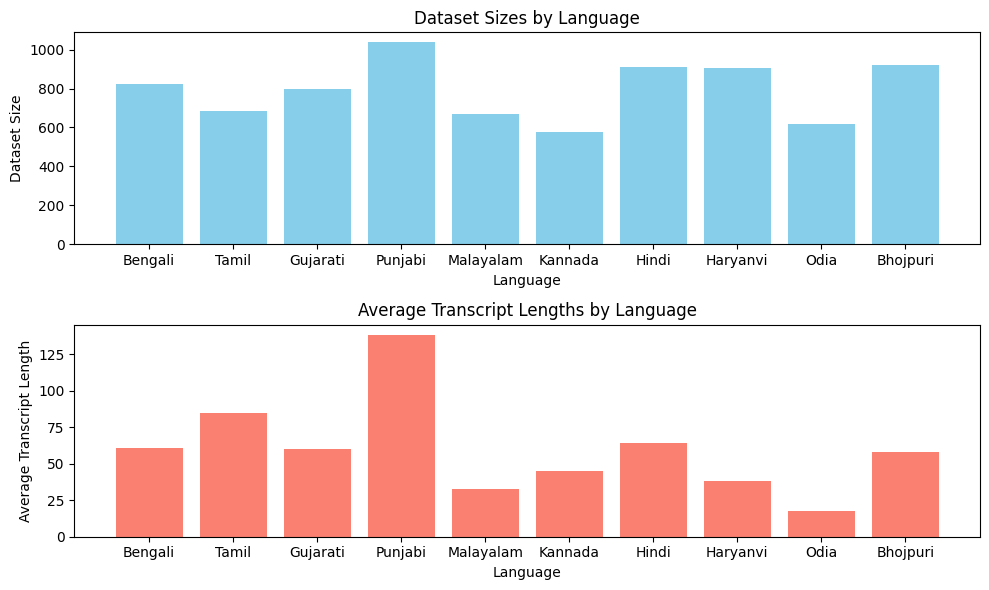

In [ ]:
import matplotlib.pyplot as plt

# Data
languages = ['Bengali', 'Tamil', 'Gujarati', 'Punjabi', 'Malayalam', 'Kannada', 'Hindi', 'Haryanvi', 'Odia', 'Bhojpuri']
dataset_sizes = [823, 687, 796, 1037, 670, 577, 913, 907, 620, 922]
avg_lengths = [61.0559, 84.9476, 60.1043, 138.118, 32.4881, 45.3137, 64.2563, 38.1874, 17.8516, 58.2126]

# Plot
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.bar(languages, dataset_sizes, color='skyblue')
plt.title('Dataset Sizes by Language')
plt.xlabel('Language')
plt.ylabel('Dataset Size')

plt.subplot(2, 1, 2)
plt.bar(languages, avg_lengths, color='salmon')
plt.title('Average Transcript Lengths by Language')
plt.xlabel('Language')
plt.ylabel('Average Transcript Length')

plt.tight_layout()
plt.show()

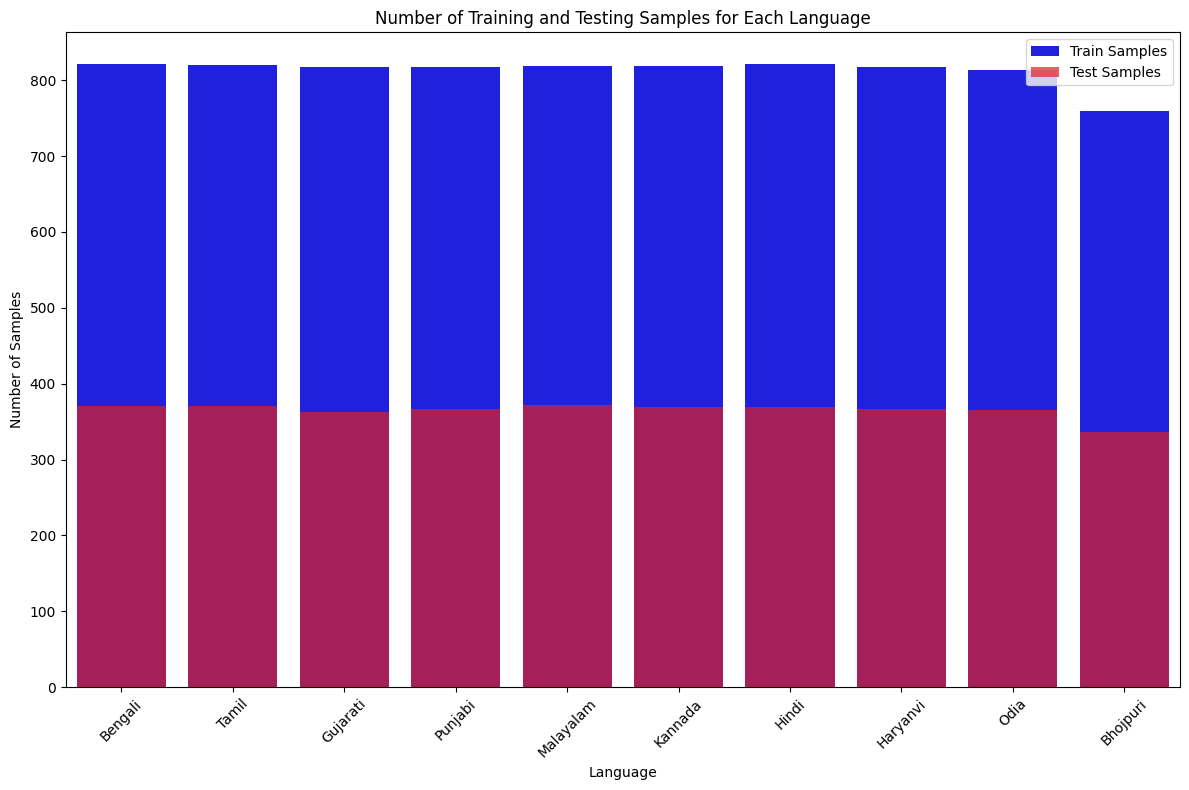

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Paths to the CSV files
file_paths = {
    'Bengali': {
        'train': '/content/drive/MyDrive/adima/PRIMA-20240228T071801Z-002/PRIMA/annotations/Bengali_train.csv',
        'test': '/content/drive/MyDrive/adima/PRIMA-20240228T071801Z-002/PRIMA/annotations/Bengali_test.csv'
    },
    'Tamil': {
        'train': '/content/drive/MyDrive/adima/PRIMA-20240228T071801Z-002/PRIMA/annotations/Tamil_train.csv',
        'test': '/content/drive/MyDrive/adima/PRIMA-20240228T071801Z-002/PRIMA/annotations/Tamil_test.csv'
    },
    'Gujarati': {
        'train': '/content/drive/MyDrive/adima/PRIMA-20240228T071801Z-002/PRIMA/annotations/Gujarati_train.csv',
        'test': '/content/drive/MyDrive/adima/PRIMA-20240228T071801Z-002/PRIMA/annotations/Gujarati_test.csv'
    },
    'Punjabi': {
        'train': '/content/drive/MyDrive/adima/PRIMA-20240228T071801Z-002/PRIMA/annotations/Punjabi_train.csv',
        'test': '/content/drive/MyDrive/adima/PRIMA-20240228T071801Z-002/PRIMA/annotations/Punjabi_test.csv'
    },
    'Malayalam': {
        'train': '/content/drive/MyDrive/adima/PRIMA-20240228T071801Z-002/PRIMA/annotations/Malayalam_train.csv',
        'test': '/content/drive/MyDrive/adima/PRIMA-20240228T071801Z-002/PRIMA/annotations/Malayalam_test.csv'
    },
    'Kannada': {
        'train': '/content/drive/MyDrive/adima/PRIMA-20240228T071801Z-002/PRIMA/annotations/Kannada_train.csv',
        'test': '/content/drive/MyDrive/adima/PRIMA-20240228T071801Z-002/PRIMA/annotations/Kannada_test.csv'
    },
    'Hindi': {
        'train': '/content/drive/MyDrive/adima/PRIMA-20240228T071801Z-002/PRIMA/annotations/Hindi_train.csv',
        'test': '/content/drive/MyDrive/adima/PRIMA-20240228T071801Z-002/PRIMA/annotations/Hindi_test.csv'
    },
    'Haryanvi': {
        'train': '/content/drive/MyDrive/adima/PRIMA-20240228T071801Z-002/PRIMA/annotations/Haryanvi_train.csv',
        'test': '/content/drive/MyDrive/adima/PRIMA-20240228T071801Z-002/PRIMA/annotations/Haryanvi_test.csv'
    },
    'Odia': {
        'train': '/content/drive/MyDrive/adima/PRIMA-20240228T071801Z-002/PRIMA/annotations/Odia_train.csv',
        'test': '/content/drive/MyDrive/adima/PRIMA-20240228T071801Z-002/PRIMA/annotations/Odia_test.csv'
    },
    'Bhojpuri': {
        'train': '/content/drive/MyDrive/adima/PRIMA-20240228T071801Z-002/PRIMA/annotations/Bhojpuri_train.csv',
        'test': '/content/drive/MyDrive/adima/PRIMA-20240228T071801Z-002/PRIMA/annotations/Bhojpuri_test.csv'
    }
}

# Load data and calculate number of samples for each language
data = []
for lang in file_paths:
    train_df = pd.read_csv(file_paths[lang]['train'])
    test_df = pd.read_csv(file_paths[lang]['test'])
    train_samples = len(train_df)
    test_samples = len(test_df)
    data.append({'Language': lang, 'Train Samples': train_samples, 'Test Samples': test_samples})

# Create DataFrame from data
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='Language', y='Train Samples', color='blue', label='Train Samples')
sns.barplot(data=df, x='Language', y='Test Samples', color='red', alpha=0.7, label='Test Samples')
plt.title('Number of Training and Testing Samples for Each Language')
plt.xlabel('Language')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import speech_recognition as sr

def transcribe_audio(audio_file,lang,):
    recognizer = sr.Recognizer()

    with sr.AudioFile(audio_file) as source:
        audio_data = recognizer.record(source)

    try:
        # Recognize speech using Google Web Speech API
        result = recognizer.recognize_google(audio_data, language=lang, show_all=True)

        # Access additional information
        alternatives = result.get("alternative", [])
        for alternative in alternatives:
            transcript = alternative["transcript"]
            confidence = alternative.get("confidence", None)
            print(f"Transcript: {transcript}, Confidence: {confidence}")

    except sr.UnknownValueError:
        print("Speech recognition could not understand audio")
    except sr.RequestError as e:
        print(f"Could not request results from Google Speech Recognition service; {e}")


In [ ]:
audio_file = "/content/drive/MyDrive/adima/audios-001/Prima/SC_audio_Bengali/Abuse_0.wav"
transcribe_audio(audio_file,"bn-IN")

Transcript: মাদারচোদ তুই খানকির ছেলে গুদমারানি খানকির ছেলে খানকির ছেলে গুদমারানি খানকির ছেলে মাদারচোদ, Confidence: 0.88447982
Transcript: মাদারচোদ তুই খানকির ছেলে গুদমারানি খানকির ছেলে খানকির ছেলে গুদমারানি খানকির ছেলে, Confidence: None
Transcript: মাদারচোদ তুই খানকির ছেলে গুদমারানি খানকির ছেলে খানকির ছেলে গুদমারানি ছেলে, Confidence: None
Transcript: মাদারচোদ তুই খানকির ছেলে গুদমারানি খানকির ছেলে খানকির ছেলে গুদমারানি, Confidence: None


In [ ]:
audio_file = "/content/drive/MyDrive/adima/audios-001/Prima/SC_audio_Bhojpuri/Abuse_125.wav"
transcribe_audio(audio_file,"hi-IN")

Transcript: हेलो चार नंबर चार नंबर कहां से हो, Confidence: None
Transcript: हेलो 4 नंबर 4 नंबर कहां से हो, Confidence: None
Transcript: हेलो चार नंबर चैनल कहां से हो, Confidence: None
Transcript: हेलो चार नंबर चारमीनार कहां से हो, Confidence: None
Transcript: हेलो -4 नंबर 4 नंबर कहां से हो, Confidence: None


In [ ]:
audio_file = "/content/drive/MyDrive/adima/audios-001/Prima/SC_audio_Gujarati/Abuse_0.wav"
transcribe_audio(audio_file,"gu-IN")

Transcript: અમે તારી બેન નો ભોંસડો મારે માદર ચૌદ તારી માનો પિકો મારે તારી માનો ભોંસડો ઉપર સંપર્ક મારીને ચોદો ભોંસ મારીના તારી માનો પિકો મારે ભોંસડો તારા બાપને તારી માનો લોડો મારે, Confidence: 0.86772144
Transcript: અમે તારી બેન નો ભોંસડો મારે માદર ચૌદ તારી માનો પિકો મારે તારી માનો ભોંસડો ઉપર સંપર્ક મારીને ચોદો ભોંસ મારીના તારી માનો પિકો મારે ભોંસડો તારા બાપને તારી માનો લોડો મારે ઉપર, Confidence: None
Transcript: અમે તારી બેન નો ભોંસડો મારે માદર ચૌદ તારી માનો પિકો મારે તારી માનો ભોંસડો ઉપર સંપર્ક મારીને ચોદો ભોંસ મારીના તારી માનો પિકો મારે ભોંસડો તારા બાપને તારી માનો લોડો મારે ઉપર નારી, Confidence: None
Transcript: અમે તારી બેન નો ભોંસડો મારે માદર ચૌદ તારી માનો પિકો મારે તારી માનો ભોંસડો ઉપર સંપર્ક મારીને ચોદો ભોંસ મારીના તારી માનો પિકો મારે ભોંસડો તારા બાપને તારી માનો લોડો મારે પણ, Confidence: None


In [ ]:
audio_file = "/content/drive/MyDrive/adima/audios-001/Prima/SC_audio_Haryanvi/Abuse_0.wav"
transcribe_audio(audio_file,"hi-IN")

Transcript: तेरी बहन का, Confidence: None


In [ ]:
audio_file = "/content/drive/MyDrive/adima/audios-001/Prima/SC_audio_Hindi/Abuse_0.wav"
transcribe_audio(audio_file,"hi-IN")

Transcript: तेरी बहन का भोंसड़ा मादरचोद तेरी बहन का भोंसड़ा मादरचोद चुप चुप चुप चुप, Confidence: None
Transcript: तेरी बहन का भोंसड़ा मादरचोद तेरी बहन का भोंसड़ा मादरचोद चुप चुप चुप चुप चुप, Confidence: None
Transcript: तेरी बहन का भोंसड़ा मादरचोद तेरी बहन का भोंसड़ा मादरचोद चुप चुप चुप चुप चुप चुप, Confidence: None
Transcript: तेरी बहन का भोंसड़ा मादरचोद तेरी बहन का भोंसड़ा मादरचोद चुप चुप चुप, Confidence: None
Transcript: तेरी बहन का भोंसड़ा मादरचोद तेरी बहन का भोंसड़ा मादरचोद चुप चुप चुप चुप चुप चुप चुप, Confidence: None


In [ ]:
audio_file = "/content/drive/MyDrive/adima/audios-001/Prima/SC_audio_Kannada/Abuse_10.wav"
transcribe_audio(audio_file,"kn-IN")

Transcript: ನಿಮ್ಮ ಮನೆಗೆ ನಿಮ್ಮವ್ವನ್ ತುಲ್ಲ್ ನಡಿ ನಡಿ ನಡಿ ನಡಿ ನಡಿ ಆಯ್ತಾ ಬಿಡುತ್ತೆ ಯಾರು, Confidence: 0.83882803
Transcript: ನಿಮ್ಮ ಮನೆಗೆ ನಿಮ್ಮವ್ವನ್ ತುಲ್ಲ್ ನಡಿ ನಡಿ ನಡಿ ನಡಿ ನಡಿ ಆಯ್ತಾ ಬಿಡುತ್ತೆ ಯಾರು ಯಾರು, Confidence: None
Transcript: ನಿಮ್ಮ ಮನೆಗೆ ನಿಮ್ಮವ್ವನ್ ತುಲ್ಲ್ ನಡಿ ನಡಿ ನಡಿ ನಡಿ ನಡಿ ಆಯ್ತಾ ಬಿಡುತ್ತೆ ಯಾರ್, Confidence: None
Transcript: ನಿಮ್ಮ ಮನೆಗೆ ನಿಮ್ಮವ್ವನ್ ತುಲ್ಲ್ ನಡಿ ನಡಿ ನಡಿ ನಡಿ ನಡಿ ಆಯ್ತಾ ಬಿಡುತ್ತೆ, Confidence: None
Transcript: ನಿಮ್ಮ ಮನೆಗೆ ನಿಮ್ಮವ್ವನ್ ತುಲ್ಲ್ ನಡಿ ನಡಿ ನಡಿ ನಡಿ ನಡಿ ಆಯ್ತಾ ಬಿಡುತ್ತೆ ಯಾರ, Confidence: None


In [ ]:
audio_file = "/content/drive/MyDrive/adima/audios-001/Prima/SC_audio_Malayalam/Abuse_15.wav"
transcribe_audio(audio_file,"ml-IN")

Transcript: കുട്ടിച്ചാത്തൻ ഐ ലവ് യു ഡാ നീ അടിച്ചു കേട്ടോ, Confidence: 0.69188786


In [ ]:
audio_file = "/content/drive/MyDrive/adima/audios-001/Prima/SC_audio_Odia/Abuse_10.wav"
transcribe_audio(audio_file,"hi-IN")

Transcript: अच्छा मुकुल सिंह के वीडियो, Confidence: None
Transcript: अच्छा मुकुल सिंह, Confidence: None
Transcript: अच्छा मुकुल सिंह के वीडियो गाना देखने की, Confidence: None
Transcript: अच्छा मुकुल सिंह की, Confidence: None
Transcript: अच्छा मुकुल सिंह के वीडियो गाना देखने के, Confidence: None


In [ ]:
audio_file = "/content/drive/MyDrive/adima/audios-001/Prima/SC_audio_Punjabi/Abuse_0.wav"
transcribe_audio(audio_file,"pa-Guru-IN")

Transcript: ਹੈਦਰਾਬਾਦ ਤੇਰੇ ਮਾ ਦੇ ਜੋ ਦੇ ਕੇ ਲੁਧਿਆਣੇ ਦਾ ਵਿਆਹ ਆ ਭੈਣ ਦੇ ਵੱਡੇ ਲਿਆ ਦਿਆ ਸਧਰਾ ਬਾਜਵਾ ਤੇਰੇ ਮਾ ਦਿਆ ਗਰਾਟਾ ਅੱਜ ਮੈਂ ਰਹਿਣ ਲੱਗ ਗਿਆ ਮੈਂ ਇੱਕ ਹੋਇਆ ਆ ਤੇਰੇ ਭੈਣ ਦਾ ਵੱਡਾ ਮਾੜਾ ਹਜੇ ਓਏ ਓਏ ਓਏ ਓਏ ਓਏ ਓਏ ਹੋਏ ਦੋਵੇਂ ਸਾਡੇ ਭੈਣ ਨੂੰ ਲਾਨਾ ਆ ਤੁਹਾਡੇ ਨਾਲ ਦੁਬਲੇ ਗੱਡੀਆਂ ਦੇ, Confidence: 0.96483725
Transcript: ਹੈਦਰਾਬਾਦ ਤੇਰੇ ਮਾ ਦੇ ਜੋ ਦੇ ਕੇ ਲੁਧਿਆਣੇ ਦਾ ਵਿਆਹ ਆ ਭੈਣ ਦੇ ਵੱਡੇ ਲਿਆ ਦਿਆ ਸਧਰਾ ਬਾਜਵਾ ਤੇਰੇ ਮਾ ਦਿਆ ਗਰਾਟਾ ਅੱਜ ਮੈਂ ਰਹਿਣ ਲੱਗ ਗਿਆ ਮੈਂ ਇੱਕ ਹੋਇਆ ਆ ਤੇਰੇ ਭੈਣ ਦਾ ਵੱਡਾ ਮਾੜਾ ਹਜੇ ਓਏ ਓਏ ਓਏ ਓਏ ਓਏ ਓਏ ਹੋਏ ਦੋਵੇਂ ਸਾਡੇ ਭੈਣ ਨੂੰ ਲਾਨਾ ਆ ਤੁਹਾਡੇ ਨਾਲ ਦੁਬਲੇ ਡੱਟਿਆਂ ਦੇ, Confidence: None
Transcript: ਹੈਦਰਾਬਾਦ ਤੇਰੇ ਮਾ ਦੇ ਜੋ ਦੇ ਕੇ ਲੁਧਿਆਣੇ ਦਾ ਵਿਆਹ ਆ ਭੈਣ ਦੇ ਵੱਡੇ ਲਿਆ ਦਿਆ ਸਧਰਾ ਬਾਜਵਾ ਤੇਰੇ ਮਾ ਦਿਆ ਗਰਾਟਾ ਅੱਜ ਮੈਂ ਰਹਿਣ ਲੱਗ ਗਿਆ ਮੈਂ ਇੱਕ ਹੋਇਆ ਆ ਤੇਰੇ ਭੈਣ ਦਾ ਵੱਡਾ ਮਾੜਾ ਹਜੇ ਓਏ ਓਏ ਓਏ ਓਏ ਓਏ ਓਏ ਹੋਏ ਦੋਵੇਂ ਸਾਡੇ ਭੈਣ ਨੂੰ ਲਾਨਾ ਆ ਤੁਹਾਡੇ ਨਾਲ ਦੁਬਲੇ ਗੱਡੀਆਂ, Confidence: None
Transcript: ਹੈਦਰਾਬਾਦ ਤੇਰੇ ਮਾ ਦੇ ਜੋ ਦੇ ਕੇ ਲੁਧਿਆਣੇ ਦਾ ਵਿਆਹ ਆ ਭੈਣ ਦੇ ਵੱਡੇ ਲਿਆ ਦਿਆ ਸਧਰਾ ਬਾਜਵਾ ਤੇਰੇ ਮਾ ਦਿਆ ਗਰਾਟਾ ਅੱਜ ਮੈਂ ਰਹਿਣ ਲੱਗ ਗਿਆ ਮੈਂ ਇੱਕ ਹੋਇਆ ਆ ਤੇਰੇ ਭੈਣ ਦਾ ਵੱਡਾ ਮਾੜਾ ਹਜੇ ਓਏ ਓਏ ਓਏ ਓਏ ਓਏ ਓਏ ਹੋਏ ਦੋਵੇਂ ਸਾਡੇ ਭੈਣ ਨ

In [ ]:
audio_file = "/content/drive/MyDrive/adima/audios-001/Prima/SC_audio_Tamil/Abuse_15.wav"
transcribe_audio(audio_file,"ta-IN")

Transcript: ஓடு ஓடு ஓடு ஓடு ஓடு ஓடு ஓடு ஓடு ஓடு ஓடு ஓடு ஓடு ஓடு ஓடு அப்படியே உங்க அம்மா கூட அப்படி இல்லன்னா உங்க அப்பன் பூல போச்சுன்னு அப்பா, Confidence: 0.85019755


## Spectrogram

In [ ]:
!pip install --upgrade numba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 MB 21.2 MB/s eta 0:00:00
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.41.1
    Uninstalling llvmlite-0.41.1:
      Successfully uninstalled llvmlite-0.41.1
  Attempting uninstall: numba
    Found existing installation: numba 0.58.1
    Uninstalling numba-0.58.1:
      Successfully uninstalled numba-0.58.1


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal  # Import the signal module
import soundfile as sf
from tqdm import tqdm
from scipy.io import wavfile

In [ ]:
def generate_spectrogram(audio_file, output_folder):
    # Read audio file
    sr, y = wavfile.read(audio_file)

    # Compute spectrogram
    f, t, S_db = signal.spectrogram(y, sr)

    # Plot and save the spectrogram
    plt.figure(figsize=(10, 5))
    plt.pcolormesh(t, f, 10 * np.log10(S_db), shading='gouraud')
    plt.colorbar(label='Intensity (dB)')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.title('Spectrogram')
    plt.savefig(os.path.join(output_folder, os.path.splitext(os.path.basename(audio_file))[0] + '_spectrogram.png'))
    plt.close()

In [ ]:
def generate_spectrograms_in_folder(input_folder, output_folder):
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Get list of audio files in the input folder
    audio_files = [os.path.join(root, file) for root, _, files in os.walk(input_folder)
                   for file in files if file.endswith('.wav') or file.endswith('.mp3')]

    # Process each audio file in the input folder with progress bar
    for audio_file in tqdm(audio_files, desc="Generating spectrograms", unit="file"):
        generate_spectrogram(audio_file, output_folder)

In [ ]:
# BENGALI
input_folder = '/content/drive/MyDrive/adima/audios-001/Prima/SC_audio_Bengali/'
output_folder = '/content/drive/MyDrive/adima/audios-001/Spectrogram/Bengali'
generate_spectrograms_in_folder(input_folder, output_folder)

Generating spectrograms:   0%|          | 0/1200 [00:00<?, ?file/s]<ipython-input-2-74c8d480b6d8>:10: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t, f, 10 * np.log10(S_db), shading='gouraud')
Generating spectrograms:  69%|██████▉   | 828/1200 [43:33<19:04,  3.08s/file]

In [ ]:
# BHOJPURI
input_folder = '/content/drive/MyDrive/adima/audios-001/Prima/SC_audio_Bhojpuri/'
output_folder = '/content/drive/MyDrive/adima/audios-001/Spectrogram/Bhojpuri'
generate_spectrograms_in_folder(input_folder, output_folder)

In [ ]:
# GUJARATI
input_folder = '/content/drive/MyDrive/adima/audios-001/Prima/SC_audio_Gujarati/'
output_folder = '/content/drive/MyDrive/adima/audios-001/Spectrogram/Gujarati'
generate_spectrograms_in_folder(input_folder, output_folder)

In [ ]:
# HARYANVI
input_folder = '/content/drive/MyDrive/adima/audios-001/Prima/SC_audio_Haryanvi/'
output_folder = '/content/drive/MyDrive/adima/audios-001/Spectrogram/Haryanvi'
generate_spectrograms_in_folder(input_folder, output_folder)

In [ ]:
# HINDI
input_folder = '/content/drive/MyDrive/adima/audios-001/Prima/SC_audio_Hindi/'
output_folder = '/content/drive/MyDrive/adima/audios-001/Spectrogram/Hindi'
generate_spectrograms_in_folder(input_folder, output_folder)

In [ ]:
# KANNADA
input_folder = '/content/drive/MyDrive/adima/audios-001/Prima/SC_audio_Kannada/'
output_folder = '/content/drive/MyDrive/adima/audios-001/Spectrogram/Kannada'
generate_spectrograms_in_folder(input_folder, output_folder)

In [ ]:
# MALAYALAM
input_folder = '/content/drive/MyDrive/adima/audios-001/Prima/SC_audio_Malayalam/'
output_folder = '/content/drive/MyDrive/adima/audios-001/Spectrogram/Malayalam'
generate_spectrograms_in_folder(input_folder, output_folder)

In [ ]:
# ODIA
input_folder = '/content/drive/MyDrive/adima/audios-001/Prima/SC_audio_Odia/'
output_folder = '/content/drive/MyDrive/adima/audios-001/Spectrogram/Odia'
generate_spectrograms_in_folder(input_folder, output_folder)

In [ ]:
# PUNJABI
input_folder = '/content/drive/MyDrive/adima/audios-001/Prima/SC_audio_Punjabi/'
output_folder = '/content/drive/MyDrive/adima/audios-001/Spectrogram/Punjabi'
generate_spectrograms_in_folder(input_folder, output_folder)

In [ ]:
# TAMIL
input_folder = '/content/drive/MyDrive/adima/audios-001/Prima/SC_audio_Tamil/'
output_folder = '/content/drive/MyDrive/adima/audios-001/Spectrogram/Tamil'
generate_spectrograms_in_folder(input_folder, output_folder)

## BASIC MODEL

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split

In [ ]:
train_annotations_path = '/content/drive/MyDrive/adima/PRIMA-20240228T071801Z-002/PRIMA/annotations/Bengali_train.csv'
test_annotations_path = '/content/drive/MyDrive/adima/PRIMA-20240228T071801Z-002/PRIMA/annotations/Bengali_test.csv'
spectrogram_path = '/content/drive/MyDrive/adima/audios-001/Spectrogram/Bengali'

train_annotations = pd.read_csv(train_annotations_path)
test_annotations = pd.read_csv(test_annotations_path)

def load_spectrogram_image(filename):
    img_path = os.path.join(spectrogram_path, filename.replace('.wav', '_spectrogram.png'))
    img = load_img(img_path, grayscale=True, target_size=(100, 100))
    img_array = img_to_array(img)
    return img_array / 255.0

In [ ]:
X_train = np.array([load_spectrogram_image(filename) for filename in train_annotations['filename']])
y_train = np.array(train_annotations['label'].map({'Yes': 1, 'No': 0}))

X_test = np.array([load_spectrogram_image(filename) for filename in test_annotations['filename']])
y_test = np.array(test_annotations['label'].map({'Yes': 1, 'No': 0}))

/usr/local/lib/python3.10/dist-packages/keras/src/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
21/21 [==============================] - 24s 1s/step - loss: 0.6996 - accuracy: 0.4977 - val_loss: 0.6874 - val_accuracy: 0.6000
Epoch 2/50
21/21 [==============================] - 17s 792ms/step - loss: 0.6946 - accuracy: 0.5114 - val_loss: 0.6926 - val_accuracy: 0.4242
Epoch 3/50
21/21 [==============================] - 13s 628ms/step - loss: 0.6925 - accuracy: 0.5084 - val_loss: 0.6830 - val_accuracy: 0.6000
Epoch 4/50
21/21 [==============================] - 13s 624ms/step - loss: 0.6918 - accuracy: 0.5160 - val_loss: 0.6983 - val_accuracy: 0.4000
Epoch 5/50
21/21 [==============================] - 12s 567ms/step - loss: 0.6858 - accuracy: 0.5327 - val_loss: 0.6520 - val_accuracy: 0.6303
Epoch 6/50
21/21 [==============================] - 12s 546ms/step - loss: 0.6766 - accuracy: 0.5738 - val_loss: 0.6216 - val_accuracy: 0.7030
Epoch 7/50
21/21 [==============================] - 13s 589ms/step - loss: 0.6403 - accuracy: 0.6377 - val_loss: 0.5821 - val_accuracy: 0.7697
Ep

In [ ]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

train_accuracy = accuracy_score(y_train, np.round(train_predictions))
test_accuracy = accuracy_score(y_test, np.round(test_predictions))

train_f1_score = f1_score(y_train, np.round(train_predictions))
test_f1_score = f1_score(y_test, np.round(test_predictions))

train_auc = roc_auc_score(y_train, train_predictions)
test_auc = roc_auc_score(y_test, test_predictions)

12/12 [==============================] - 2s 128ms/step


In [ ]:
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Training F1 Score:", train_f1_score)
print("Testing F1 Score:", test_f1_score)
print("Training AUC:", train_auc)
print("Testing AUC:", test_auc)

Training Accuracy: 0.9416058394160584
Testing Accuracy: 0.6918918918918919
Training F1 Score: 0.9435294117647058
Testing F1 Score: 0.7385321100917431
Training AUC: 0.9661541107263153
Testing AUC: 0.7397279035792548


In [ ]:
print("Testing Accuracy:", test_accuracy)
print("Testing F1 Score:", test_f1_score)
print("Testing AUC:", test_auc)

Testing Accuracy: 0.6918918918918919
Testing F1 Score: 0.7385321100917431
Testing AUC: 0.7397279035792548


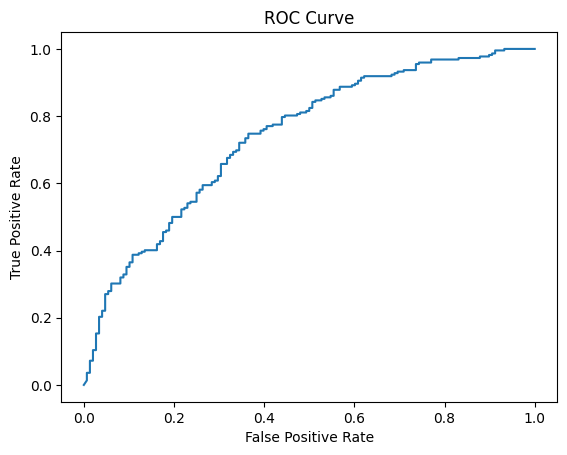

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Text(0, 0.5, 'True Labels')

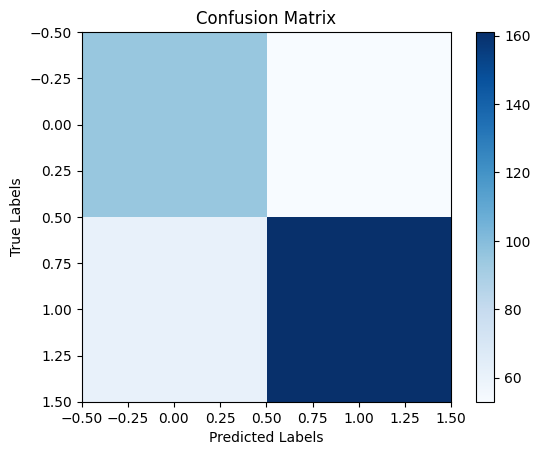

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_pred_binary = np.round(test_predictions).astype(int)

cm = confusion_matrix(y_test, y_pred_binary)

plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

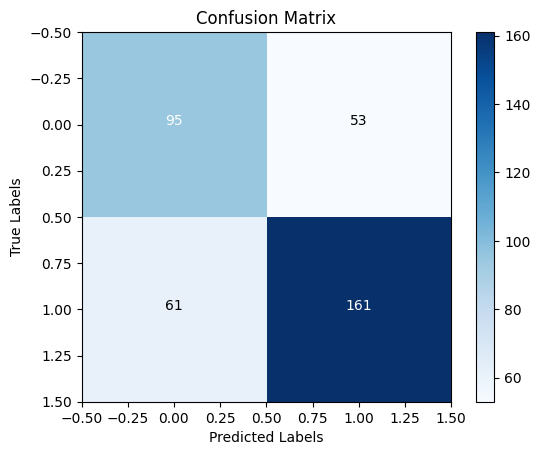

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_pred_binary = np.round(test_predictions).astype(int)

cm = confusion_matrix(y_test, y_pred_binary)

plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
plt.show()